# Assignment 2(a): Logistics regression 


# Introduction
Tipping is a cultural phenomenon that varies widely across the globe. This dataset from 2024 provides an intriguing glimpse into the tipping behaviors in a city's restaurants. Let's dive in and see what insights we can uncover.

# Data Loading
##### Let's start by loading the dataset and looking at its structure first.
##### Task1: Import the required libraries
##### Task2: Load the data set
##### Task3: Explore the first 5 rows of the data set
##### Task4: Explore the information about data set using .info()

In [8]:
import pandas as pd
data = pd.read_csv("iphone_purchase_records.csv")
print(data.head())
print()
print(data.info())
print()
data2 = pd.read_csv("Tips Dataset.csv")
print(data2.head())
print()
print(data2.info())


   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

   Unnamed: 0  person  total     cuisine    restaurant sitting_time  \
0           0       2    819  vegetarian  Restaurant_5       142min   
1           1       3   1011     chinese  Restaurant_3        54min   
2           2       6   4224       kebab  Restaurant_9       112min   
3           3       8   1142     seafood  Re

# Data Cleaning and Preprocessing
Before diving into analysis, let's clean and preprocess the data. This includes handling missing values, correcting data types, and removing unnecessary columns.

In [25]:
# Drop the 'Unnamed: 0' column as it seems to be an index
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in data2.columns:
    data2 = data2.drop(columns=['Unnamed: 0'])

print(data)
print(data2)
# Check for missing values
print("Missing values:")
print(data.isnull().sum())
print()

print("Missing values:")
print(data2.isnull().sum())



     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]
     person  total     cuisine    restaurant sitting_time payment_type  tips
0         2    819  vegetarian  Restaurant_5       142min  credit_card   125
1         3   1011     chinese  Restaurant_3        54min  credit_card   145
2         6   4224       kebab  Restaurant_9       112min         cash   330
3         8   1142     seafood  Restaurant_2       202min         cash   245
4         1    519       world  Restaurant_5        98min         cash   100
..      ..

The dataset appears to be clean with no missing values. Let's proceed to explore the data.

# Exploratory Data Analysis
In this section, we will explore the dataset using various visualization techniques to uncover patterns and insights.

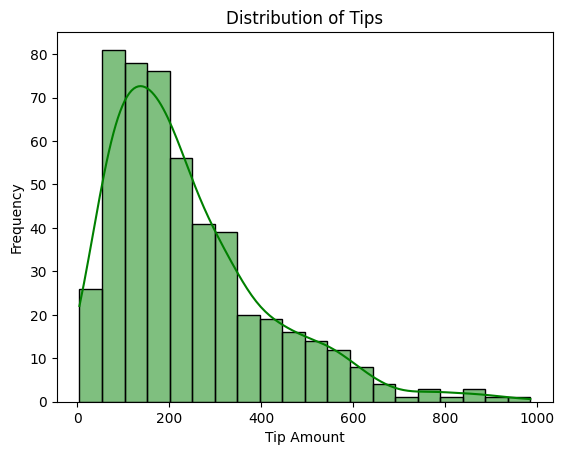

In [40]:
# Distribution of tips
# Plot histogram using histplot keep Title: 'Distribution of Tips', Y axis: 'Frequency', X axis: 'Tip Amount', Bins = 20
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=data2, x='tips', bins=20, kde=True,color='green')
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()



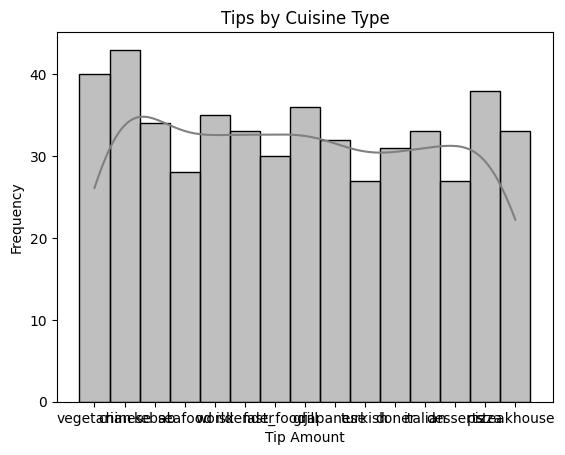

In [42]:
# Tips by cuisine type
# Keep title: 'Tips by Cuisine Type'
sns.histplot(data= data2,x='cuisine',bins = 20,kde= True,color='grey')
plt.title('Tips by Cuisine Type')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

plt.show()

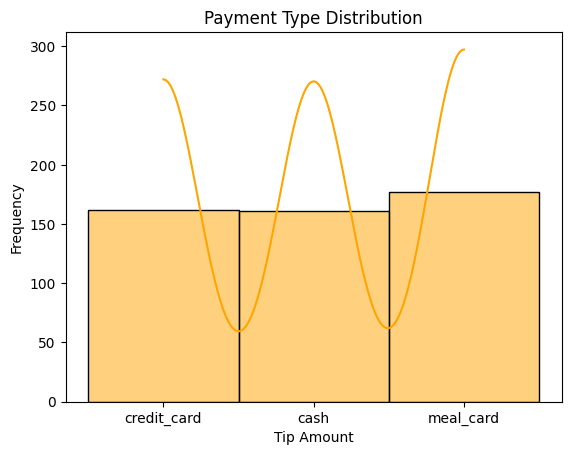

In [39]:
# Payment type distribution
# title: 'Payment Type Distribution'

sns.histplot(data = data2,x='payment_type',bins=20,kde=True,color='orange')
plt.title("Payment Type Distribution")
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()


# Predictive Modeling
Let's see if we can predict the tip amount based on other features in the dataset. We'll use a simple linear regression model for this task.

In [51]:
# import train_test_split
#import LinearRegression
#import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = data2[['total', 'person']]  
y = data2['tips'] 

# Split the data, keep random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


## Evaluate the Model


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
## R2 is in between 0 to 1 thus our prediction is perfect !!
r2

0.3562309177183568

# Good Job!